_Lambda School Data Science — Practicing & Understanding Predictive Modeling_

# Gradient Descent

<a href="https://twitter.com/dorrismccomics/status/1022803306173923328"><img src="https://pbs.twimg.com/media/DjG6LapXcAAQ46q?format=jpg" alt="oh no"></a>

## 3Blue1Brown, [Gradient descent, how neural networks learn](https://www.youtube.com/watch?v=IHZwWFHWa-w&t=2s&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi)

It's provocative to describe a machine as learning. Once you actually see how it works, it feels a lot less like some crazy sci-fi premise and a lot more like, well, a calculus exercise. Basically it comes down to finding the minimum of a certain function. 

You define a cost function: a way of telling the computer: "No, bad computer!" But just telling the computer what a crappy job it's doing isn't very helpful. You want to tell it how to _change_ those weights and biases, so that it gets better.

Just imagine a simple function that has one number as an input and one number as an output. How do you find an input that minimizes the value of this function?

![image.png](attachment:image.png)

Calculus students will know that you can sometimes figure out that minimum explicitly. But that's not always feasible for really complicated functions.

A more flexible tactic is to start at any old input and figure out which direction you should step to make that output lower.

Specifically, if you can figure out the slope of the function where you are, then shift to the left if that slope is positive, and shift the input to the right if that slope is negative.

If you do this repeatedly at each point, checking the new slope and taking the appropriate step, you're gonna approach some local minimum of the function.

---

Bumping up the complexity a bit, imagine instead a function with _two_ inputs and one output.

Now instead of asking about the slope of the function, you have to ask which direction should you step, to decrease the output of the function most quickly? In other words, what's the downhill direction? It's helpful to think of a ball rolling down that hill.

![](https://media.giphy.com/media/cLGkK33brqidKXS8dS/giphy.gif)

Those of you familiar with multivariable calculus will know that the gradient of a function gives you the direction of steepest ascent. Taking the negative of that gradient gives you the direction to step that decreases the function most quickly

If you're unfamiliar with multivariable calculus, honestly, all that matters for you and me right now is that there exists a way to compute this downhill direction. You'll be okay if that's all you know and you're not rock solid on the details.

Because if you can get that, the algorithm for minimizing the function is to 

- compute this gradient direction, 
- then take a small step downhill, 
- and just repeat that over and over. 

It's the same basic idea for a function that has 13,000 inputs instead of two inputs. This process of repeatedly nudging an input of a function by some multiple of the negative gradient is called gradient descent.

---

## Let's code it!

> You define a cost function: a way of telling the computer: "No, bad computer!" But just telling the computer what a crappy job it's doing isn't very helpful. You want to tell it how to _change_ those weights and biases, so that it gets better.
>
> Just imagine a simple function that has one number as an input and one number as an output. 

Let's plot a function like that: $f(x) = x^2$

Text(0, 0.5, 'f(x) = x**2')

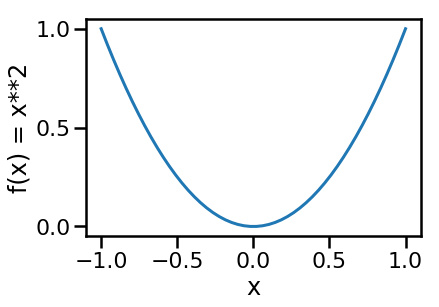

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('poster')

# plot the function x^2

xs = np.linspace(start=-1, stop=1)

squares = xs ** 2
plt.plot(xs, squares)

plt.xlabel('x')
plt.ylabel('f(x) = x**2')

> How do you find an input that minimizes the value of this function?
>
> You can sometimes figure out that minimum explicitly. But that's not always feasible for really complicated functions.
>
> A more flexible tactic is to start at any old input ...

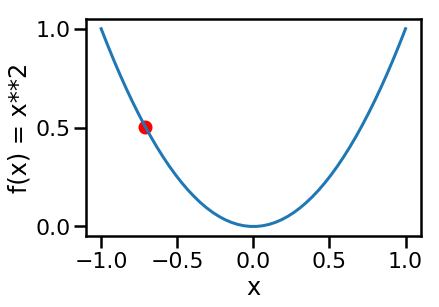

In [16]:
# plot x**2
xs = np.linspace(start=-1, stop=1)

squares = xs ** 2
plt.plot(xs, squares)

plt.xlabel('x')
plt.ylabel('f(x) = x**2')

# plot point
x = np.random.uniform(-1,1)
y = x ** 2
plt.scatter(x,y, color='red')


> Start at any old input and figure out which direction you should step to make that output lower.
>
> Specifically, if you can figure out the slope of the function where you are, then shift to the left if that slope is positive, and shift the input to the right if that slope is negative.

Gradient: -1.2012542454072044
Shift to the right


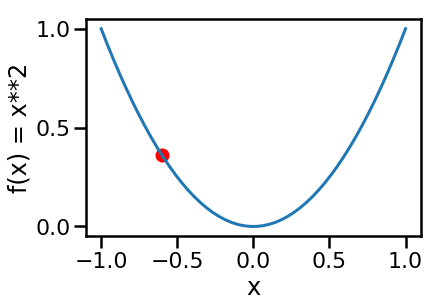

In [36]:
# plot x**2
xs = np.linspace(start=-1, stop=1)

squares = xs ** 2
plt.plot(xs, squares)

plt.xlabel('x')
plt.ylabel('f(x) = x**2')

# plot point
x = np.random.uniform(-1,1)
y = x ** 2
plt.scatter(x,y, color='red')

# calculate derivate
derivative = 2*x
print('Gradient:', derivative)

# plot line


if derivative > 0:
  print('Shift to the left')
elif derivative < 0:
  print('Shift to the right')
else:
  print('Minimized value of function!')

> If you do this repeatedly at each point, checking the new slope and taking the appropriate step, you're gonna approach some local minimum of the function.

Gradient: 0
Minimized value of function!


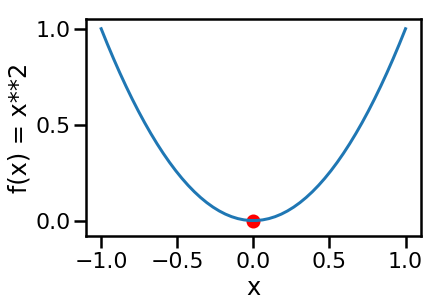

In [38]:
def check_slope(x):
  # plot x**2
  xs = np.linspace(start=-1, stop=1)

  squares = xs ** 2
  plt.plot(xs, squares)
  
  y = x ** 2
  plt.scatter(x,y, color='red')

  plt.xlabel('x')
  plt.ylabel('f(x) = x**2')
  
  # calculate derivate
  derivative = 2*x
  print('Gradient:', derivative)

  # plot line


  if derivative > 0:
    print('Shift to the left')
  elif derivative < 0:
    print('Shift to the right')
  else:
    print('Minimized value of function!')
  
check_slope(0)  

> The algorithm for minimizing the function is to 
>
> - compute this gradient direction, 
> - then take a small step downhill, 
> - and just repeat that over and over. 
>
> This process of repeatedly nudging an input of a function by some multiple of the negative gradient is called gradient descent.

In [42]:
iterations = 20
learning_rate = .1 # alpha

x = np.random.uniform(-1,1)

for _ in range(iterations):
  gradient = 2*x
  x += learning_rate * -gradient
  print(x)

-0.6080390237496403
-0.4864312189997122
-0.38914497519976976
-0.3113159801598158
-0.24905278412785264
-0.1992422273022821
-0.15939378184182568
-0.12751502547346055
-0.10201202037876844
-0.08160961630301475
-0.0652876930424118
-0.05223015443392944
-0.04178412354714355
-0.03342729883771484
-0.026741839070171875
-0.0213934712561375
-0.01711477700491
-0.013691821603928001
-0.010953457283142402
-0.008762765826513922


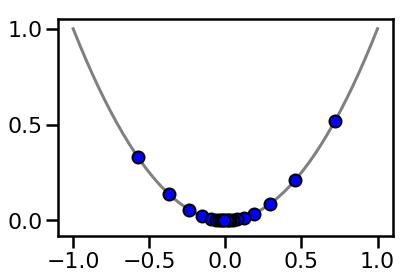

In [62]:
def gradient_descent(start_at=np.random.uniform(-1,1), iterations=20, learning_rate=.1):
  xs = np.linspace(-1,1)
  squares = xs**2
  plt.plot(xs, squares, color='grey')
  
  x = start_at
  for n in range(iterations):
    gradient = 2*x
    x += learning_rate * -gradient
    y = x**2
    plt.scatter(x, y, color='blue', edgecolor='black', zorder=3)
    
gradient_descent(start_at=-.9, iterations=20, learning_rate=.9)

## NEXT: Solving Linear Regression with Gradient Descent

Let's look at the first quadrant of Anscombe's quartet. 

We can draw a line to fit the data, adjust the line's slope, and visualize the cost function.

---
***We can use Gradient Descent to solve Linear Regression. Here's how:***

## Andrew Ng, [Gradient Descent for Linear Regression](https://www.coursera.org/lecture/machine-learning/gradient-descent-for-linear-regression-kCvQc) with One Variable

> We're gonna put together gradient descent with our squared error cost function, and that will give us an algorithm for linear regression.
>
> In order to apply gradient descent, we need the partial derivative terms. Computing those partial derivative terms requires some multivariate calculus. If you know calculus, feel free to work through the derivations yourself and check that if you take the derivatives, you actually get the answers that I got. But if you're less familiar with calculus, don't worry about it and it's fine to just take these equations that were worked out.


![Screen%20Shot%202019-05-16%20at%209.27.04%20AM.png](attachment:Screen%20Shot%202019-05-16%20at%209.27.04%20AM.png)

#### Let's translate this math notation into Python code:

#### Then use our code to solve linear regression problems with one variable.

# ASSIGNMENT

Choose of these options, and ***share your work with your cohort on Slack!***

### Visualize
- How can you adapt or improve these visualizations?
   - Could you draw tangent lines in the cost function visualizations?
   - Could you create an interactive visualization of gradient descent for linear regression?
   - Could you explain these concepts in different ways, by creating different visualizations?
- [Lambda School DS2 student Cole Hudson created an awesome visualization!](https://gist.github.com/colejhudson/5cb08e9c51d1600a799deb25758a1c61) He implemented gradient descent to optimize a complex ["Rosenbrock function"](https://en.wikipedia.org/wiki/Rosenbrock_function), and visualized it in 3D. What can you learn from this example? What will you be inspired to create?

### Implement
- We implemented gradient descent for linear regression with one variable. Can you extend the code to work for multiple regression?
- Choose another regression dataset. Fit the data with your gradient descent code, and without. (For example, use scikit-learn's Linear Regression model.) Compare your results.

### Understand
Explore another explanation or tutorial for Gradient Descent. You can use these links, or find another link of your choice. Share a quote or image from your link to show what you learn.

- [Andrew Ng, Gradient Descent](https://www.coursera.org/lecture/machine-learning/gradient-descent-8SpIM)
- [Brandon Rohrer, How Optimization Works](https://brohrer.github.io/how_optimization_works_1.html)
- [Google Machine Learning Crash Course, Reducing Loss: An Iterative Approach](https://developers.google.com/machine-learning/crash-course/reducing-loss/an-iterative-approach)
- [Joel Grus, Data Science from Scratch, 2nd Edition](https://joelgrus.com/2019/05/13/data-science-from-scratch-second-edition/), Chapter 8: Gradient Descent
- [Kalid Azad, Understanding the Gradient](https://betterexplained.com/articles/vector-calculus-understanding-the-gradient/)
- [Siraj Raval, The Evolution of Gradient Descent](https://www.youtube.com/watch?v=nhqo0u1a6fw)
- [Terence Parr, Jeremy Howard, How to explain gradient boosting](https://explained.ai/gradient-boosting/)

### Explore more model interpretation visualizations
Yesterday, we looked at just a few options in a few Python libraries for model interpretation visualizations. Explore more options to create new visuals in new ways. This isn't about Gradient Descent, but would be a great use of your time too!

- https://github.com/TeamHG-Memex/eli5
- https://github.com/slundberg/shap
- https://github.com/oracle/Skater